In [6]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

In [7]:
class EpsilonGreedyAgent:
    def __init__(self, epsilon: float = 0.1, decay: float = 0.999, min_epsilon: float = 0.01):
        
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.decay = decay
        self.num_arms = 10
        self.Q = np.zeros(self.num_arms)  
        self.N = np.zeros(self.num_arms)  
        
    def select_action(self) -> int:
        
        if np.random.random() < self.epsilon:
            return np.random.randint(self.num_arms)  
        else:
            return np.random.choice(np.where(self.Q == self.Q.max())[0])  

    def update(self, action: int, reward: float):
        
        self.N[action] += 1
        self.Q[action] += (1.0 / self.N[action]) * (reward - self.Q[action])
        
        self.epsilon = max(self.min_epsilon, self.epsilon * self.decay)

In [8]:
class NonStationaryBandit:
    def __init__(self, n_arms: int = 10):
        self.n_arms = n_arms
        self.q_values = np.zeros(n_arms)
        
    def get_reward(self, action: int) -> float:
        self.q_values += np.random.normal(0, 0.01, self.n_arms)
        
        true_value = self.q_values[action]
        return np.random.normal(true_value, 1.0)

In [9]:
def test_nonstationary_bandit(num_iterations: int):
    bandit = NonStationaryBandit()
    agent = EpsilonGreedyAgent()
    rewards = []
    action_counts = np.zeros((num_iterations, bandit.n_arms))
    q_values_history = []

    for step in range(num_iterations):
        action = agent.select_action()
        reward = bandit.get_reward(action)
        agent.update(action, reward)
        
        rewards.append(reward)
        action_counts[step] = agent.N
        q_values_history.append(bandit.q_values.copy())

    action_counts = action_counts.tolist()

    plt.figure(figsize=(15, 10))

    plt.subplot(2, 2, 1)
    plt.plot(rewards)
    plt.xlabel('Time step')
    plt.ylabel('Reward')
    plt.title('Rewards Over Time')

    plt.subplot(2, 2, 2)
    plt.bar(range(bandit.n_arms), np.sum(action_counts, axis=0))
    plt.xlabel('Action (Arm)')
    plt.ylabel('Number of Selections')
    plt.title('Action Counts')

    plt.subplot(2, 2, 3)
    q_values_history = np.array(q_values_history)
    for arm in range(bandit.n_arms):
        plt.plot(q_values_history[:, arm], label=f'Arm {arm}')
    plt.xlabel('Time step')
    plt.ylabel('True value')
    plt.title('True Values Evolution')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()


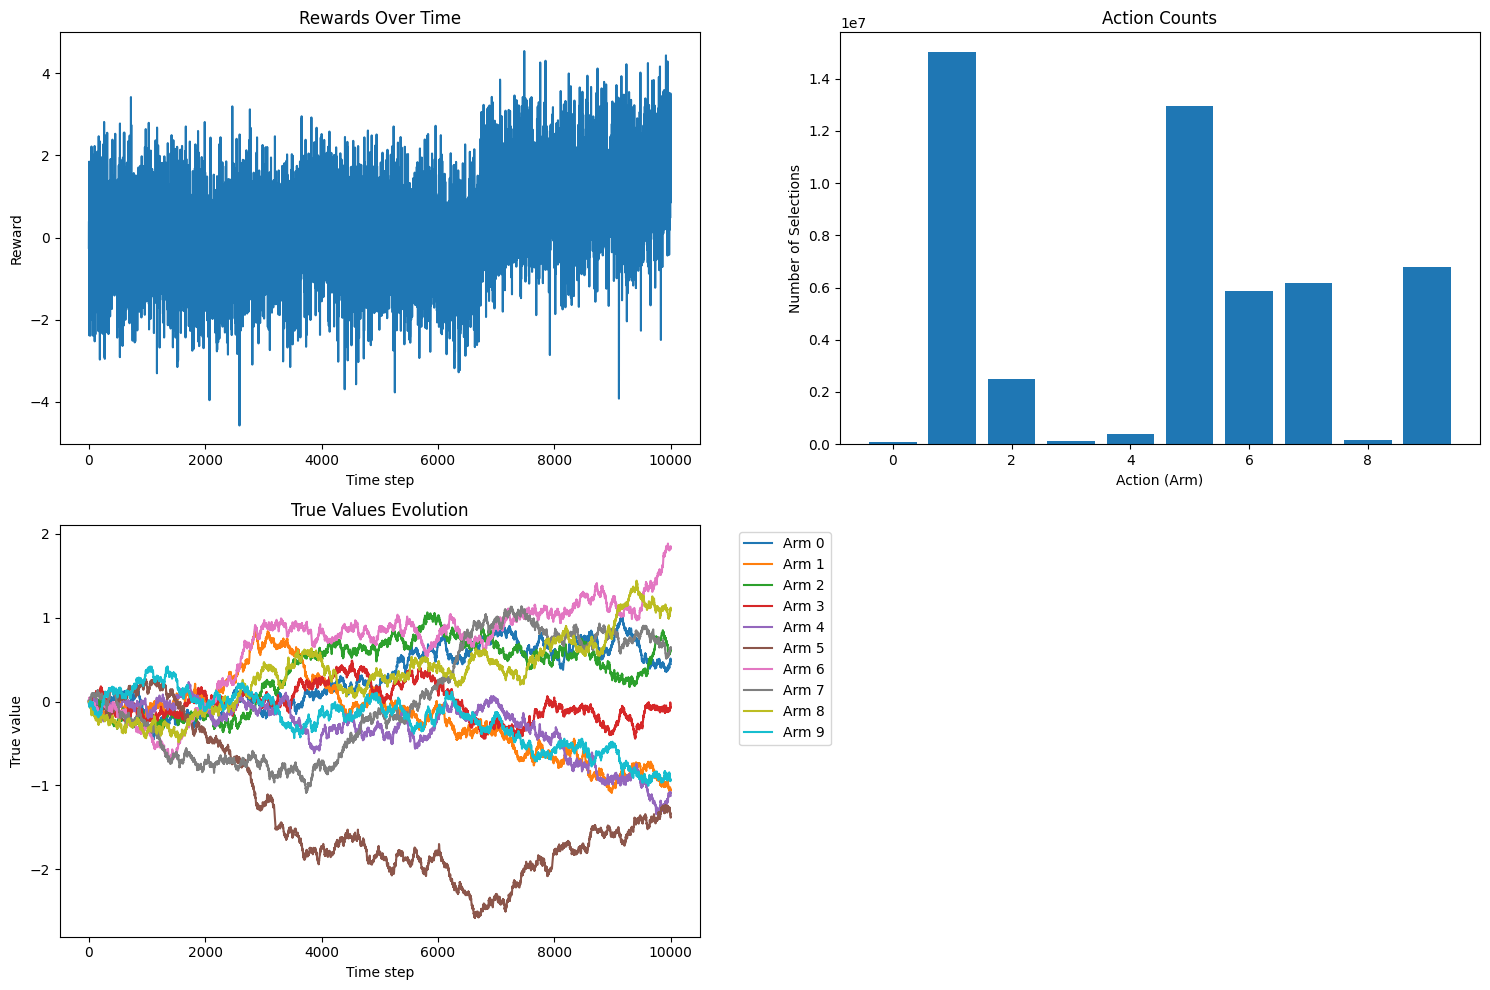

In [10]:
if __name__ == "__main__":
    test_nonstationary_bandit(10000)
